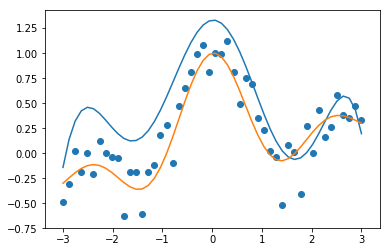

In [133]:

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

class GaussianKernelModel:
    def __init__(self, n, b_width, lam):
        self.b_width = b_width
        self.theta = 0
        self.lam = lam
        self.n = n

    def fit(self, X, Y):
        K = np.array([self._gaussian_kernel(X[i], X) for i in range(self.n)])
        self.theta = self._calc_theta(K, Y)

    def predict(self, X):
        return np.array([self.theta.dot(self._gaussian_kernel(X[i], X)) for i in range(self.n)])

    def _gaussian_kernel(self, xi, xj):
        return np.exp(-(xi - xj) ** 2 / (2 * self.b_width ** 2))

    def _calc_theta(self, K, Y):
        return np.linalg.inv(K.dot(K) + self.lam * np.ones(self.n)).dot(K).dot(Y)


def create_data(n):
    x = np.linspace(-3, 3, n)
    y = np.sin(np.pi * x) / (np.pi * x) + 0.1 * x + np.random.normal(0, 0.2, n)
    return x, y


def cross_validation(estimator, X, Y, split_num):
    error_all = 0
    for i in range(split_num):
        idx_use = np.ones(split_num, dtype=bool)
        idx_use[i] = False
        X = np.array(np.split(X, split_num))
        Y = np.array(np.split(Y, split_num))
        train_x = np.hstack(X[idx_use])
        train_y = np.hstack(Y[idx_use])
        test_x = X[i]
        test_y = Y[i]
        estimator.fit(train_x, train_y)
        prediction = estimator.predict(test_x)
        error_all += np.linalg.norm(test_y - prediction)
    return error_all / split_num


if __name__ == '__main__':
    n = 50
    X, Y = create_data(n)
    p_h = 3
    p_lambda = 0.01
    gaussian_kernel = GaussianKernelModel(n, p_h, p_lambda)
    gaussian_kernel.fit(X, Y)
    ans = gaussian_kernel.predict(X)
    plt.plot(X, ans)
    plt.scatter(X, Y)
    # correct curve
    plt.plot(X, np.sin(np.pi * X) / (np.pi * X) + 0.1 * X)

#     n = 40
#     print(cross_validation(gaussian_kernel, X, Y, 5))
#     gaussian_kernel = GaussianKernelModel(n, p_h / 2, p_lambda)
#     print(cross_validation(gaussian_kernel, X, Y, 5))